In [56]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Read and import data science job listings dataset
data_science_jobs_df = pd.read_csv("resources/data_cleaned_2021.csv")
data_science_jobs_df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [3]:
# Showing all columns to see which are relevant to our analyis
data_science_jobs_df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [41]:
# For purposes of data analysis, only going to keep relevant columns
data_analysis_df = data_science_jobs_df.drop(columns = ['Salary Estimate','Job Description','Headquarters','Location','Revenue','Competitors',
                                                         'company_txt','spark','aws',
                                                         'sql','sas','keras','pytorch','scikit',
                                                         'tensor','hadoop','tableau','bi','flink',
                                                         'mongo','google_an','job_title_sim','Hourly','Employer provided'])
# Dropped all 'sr' positions in the 'seniority_by_title' column
data_analysis_df.drop(data_analysis_df[data_analysis_df['seniority_by_title']=='sr'].index,inplace = True)

# Dropped all positions that require a master's degree 'M' and PHD degree 'P' in the 'Degree' column
data_analysis_df.drop(data_analysis_df[data_analysis_df['Degree']=='M'].index,inplace = True)
data_analysis_df.drop(data_analysis_df[data_analysis_df['Degree']=='P'].index,inplace = True)

# Dropped rows with an unknown company size
data_analysis_df.drop(data_analysis_df[data_analysis_df['Size']=='unknown'].index,inplace = True)

# Dropped rows with Python values=0 (Meaning don't require python)
data_analysis_df.drop(data_analysis_df[data_analysis_df['Python']== 0].index,inplace = True)

# Dropped rows with Excel values=0 (Meaning don't require Excel)
data_analysis_df.drop(data_analysis_df[data_analysis_df['excel']== 0].index,inplace = True)


data_analysis_df.columns

Index(['index', 'Job Title', 'Rating', 'Company Name', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Lower Salary',
       'Upper Salary', 'Avg Salary(K)', 'Job Location', 'Age', 'Python',
       'excel', 'seniority_by_title', 'Degree'],
      dtype='object')

In [53]:
# Picking out unwanted job titles from the remaining list of jobs, picking them based on not
# sounding entry level and any non-relevant

unwanted_job_titles = ['College Hire - Data Scientist - Open to December 2019 Graduates',
                       'Data Analytics Manager','MongoDB Data Engineer II','VP, Data Science',
                      'Staff Machine Learning Engineer','Staff Scientist',
                       'Director - Data, Privacy and AI Governance',
                      'Associate Data Analyst- Graduate Development Program','IT - Data Engineer II',
                      'Staff Scientist- Upstream PD','Director Data Science',
                       'Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad',
                      'Data Science Manager','Data Analyst 2 (Missionary Department)','Manager of Data Science',
                      'Quality Control Scientist III- Analytical Development',
                       'Software Engineer Staff Scientist: Human Language Technologies',
                      'Data Scientist / Machine Learning Expert','Data Management Specialist','Project Scientist',
                      'Business Data Analyst, SQL','Systems Engineer II - Data Analyst',
                      'Manager, Safety Scientist, Medical Safety & Risk Management','Revenue Analytics Manager',
                      'Associate Data Analyst','Associate Scientist, LC/MS Biologics',
                      'Corporate Risk Data Analyst (SQL Based) - Milwaukee or',
                      'Marketing Data Analyst, May 2020 Undergrad','IT Associate Data Analyst',
                      ]


# Dropping all the rows with positions in the unwanted_job_titles
for unwanted in unwanted_job_titles:
    data_analysis_df.drop(data_analysis_df[data_analysis_df['Job Title'] == unwanted].index,inplace = True)


data_analysis_df


# Made list of all jobs to easily pick out which ones we shouldn't include
# counter = 0
# for job in data_analysis_df['Job Title'].unique():
#     counter += 1
#     print("{}.{}".format(counter,job))

,index,Job Title,Rating,Company Name,Size,Founded,Type of ownership,Industry,Sector,Lower Salary,Upper Salary,Avg Salary(K),Job Location,Age,Python,excel,seniority_by_title,Degree
4,4,Data Scientist,2.9,Affinity Solutions\n2.9,51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,86,143,114.5,NY,23,1,1,na,na
5,5,Data Scientist,3.4,CyrusOne\n3.4,201 - 500,2000,Company - Public,Real Estate,Real Estate,71,119,95.0,TX,21,1,1,na,na
13,13,Data Analyst,4.1,Yesler\n4.1,201 - 500,2012,Company - Private,Advertising & Marketing,Business Services,46,85,65.5,WA,9,1,1,na,na
25,26,Digital Health Data Scientist,4.0,Pfizer\n4.0,10000+,1849,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,63,110,86.5,MA,172,1,1,na,na
26,27,Data Scientist,3.5,First Tech Federal Credit Union\n3.5,1001 - 5000,1952,Company - Private,Banks & Credit Unions,Finance,75,124,99.5,OR,69,1,1,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,879,Data Scientist,4.3,Solugenix Corporation\n4.3,201 - 500,1969,Company - Private,IT Services,Information Technology,51,88,69.5,AZ,52,1,1,na,na
687,881,Data Engineer - Consultant (Charlotte Based),4.2,Clarity Insights\n4.2,201 - 500,2008,Company - Private,IT Services,Information Technology,59,112,85.5,NC,13,1,1,na,na
688,883,Data Engineer,3.1,NCSOFT\n3.1,1001 - 5000,1997,Company - Public,Video Games,Media,79,147,113.0,CA,24,1,1,na,na
692,892,Jr. Data Scientist,3.2,MITRE\n3.2,5001 - 10000,1958,Nonprofit Organization,Federal Agencies,Government,81,132,106.5,VA,63,1,1,jr,na


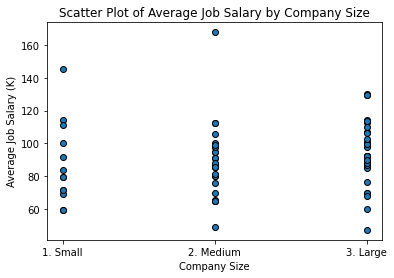

In [58]:
# Making a scatter plot of the average salaries by company size

#First gonna make a new column to define our company size categories

# We define small companies as having 1-200 employees, 
# medium companies as having 201-1000 employees,
# and large companies as having 1001-10000+ employees

# Small companies: '1 - 50 ','51 - 200 '
# Medium companies: '201 - 500 ','501 - 1000 '
# Large companies: '1001 - 5000 ','5001 - 10000 ','10000+ '

size_avg_salary = data_analysis_df.copy()

conditions = [
    (size_avg_salary['Size'] == '1 - 50 '),
    (size_avg_salary['Size'] == '51 - 200 '), 
    (size_avg_salary['Size'] == '201 - 500 '),
    (size_avg_salary['Size'] == '501 - 1000 '), 
    (size_avg_salary['Size'] == '1001 - 5000 '),
    (size_avg_salary['Size'] == '5001 - 10000 '),
    (size_avg_salary['Size'] == '10000+ ')
    ]

size_cat_list = ['1. Small','1. Small','2. Medium','2. Medium','3. Large','3. Large','3. Large']

size_avg_salary['Size Category'] = np.select(conditions, size_cat_list)

sorted_df=size_avg_salary.sort_values(by='Size Category')

plt.scatter(sorted_df['Size Category'],sorted_df['Avg Salary(K)'],marker = 'o',edgecolor = 'black')
plt.xlabel("Company Size")
plt.ylabel("Average Job Salary (K)")
plt.title("Scatter Plot of Average Job Salary by Company Size")
plt.show()

In [44]:
# You can clearly see the wide range of average salaries across the different company size
# categories. From this graph, we can conclude that medium size companies tend to pay 
# approx. 20K than small/large companies.


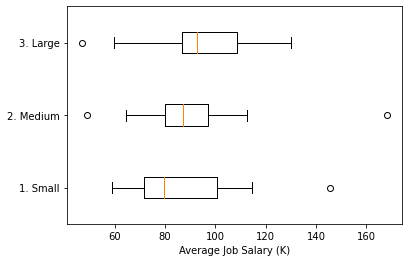

In [45]:
# Create a boxplot to get a more detailed data distribution comparison between the 3 company categories
size_categories = ['1. Small','2. Medium','3. Large']
size_cat_data = []
for size in size_categories:
    current_size = sorted_df.loc[sorted_df['Size Category'] == size]
    size_cat_data.append(current_size['Avg Salary(K)'])
    
# size_cat_data
plt.boxplot(size_cat_data,vert=False, labels = size_categories)
plt.xlabel("Average Job Salary (K)")
plt.show()

In [46]:
# Next we are going to extract the top 5 companies from each size category that have the
# corresponding top 5 highest average salary positions available

In [48]:
# Small companies
# First extract rows from df that correspond to only small companies
small_companies = sorted_df[sorted_df['Size Category'] == '1. Small']
small_companies

# Next sort the df by highest salary and dropped any duplicates
sorted_small_company_salaries = small_companies.sort_values(by = 'Avg Salary(K)',ascending = False)
clean_sorted_small_company_salaries=sorted_small_company_salaries.drop_duplicates(subset = ['Job Title', 'Rating', 'Company Name', 'Size', 'Founded','Type of ownership', 'Industry', 'Sector', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)','Job Location', 'Python', 'excel', 'seniority_by_title', 'Degree','Size Category'])
clean_sorted_small_company_salaries[['Job Title','Company Name','Age','Avg Salary(K)','Size','Size Category']].head()

# SUGGESTION: we can drop the age rows that have values of -1?????

# Below you can see the top 5 small companies with their respective job titles and avg salaries

,Job Title,Company Name,Age,Avg Salary(K),Size,Size Category
459,Data Scientist,TechProjects\n4.8,10,145.5,1 - 50,1. Small
4,Data Scientist,Affinity Solutions\n2.9,23,114.5,51 - 200,1. Small
732,Machine Learning Engineer (NLP),CK-12 Foundation\n4.1,14,111.0,1 - 50,1. Small
134,Machine Learning Engineer,Stratagem Group\n4.3,14,100.5,1 - 50,1. Small
438,Data Engineer,"Numeric, LLC\n3.2",-1,91.5,1 - 50,1. Small


In [49]:
# Medium companies
# First extract rows from df that correspond to only small companies
med_companies = sorted_df[sorted_df['Size Category'] == '2. Medium']
med_companies

# Next sort the df by highest salary and dropped any duplicates
sorted_med_company_salaries = med_companies.sort_values(by = 'Avg Salary(K)',ascending = False)
clean_sorted_med_company_salaries=sorted_med_company_salaries.drop_duplicates(subset = ['Job Title', 'Rating', 'Company Name', 'Size', 'Founded','Type of ownership', 'Industry', 'Sector', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)','Job Location', 'Python', 'excel', 'seniority_by_title', 'Degree','Size Category'])
clean_sorted_med_company_salaries[['Job Title','Company Name','Age','Avg Salary(K)','Size','Size Category']].head()

# Below you can see the top 5 medium companies with their respective job titles and avg salaries

,Job Title,Company Name,Age,Avg Salary(K),Size,Size Category
549,Data Scientist - Sales,Confluent\n4.7,7,168.0,501 - 1000,2. Medium
327,Data Scientist,New England Biolabs\n4.7,47,112.5,201 - 500,2. Medium
35,Web Data Analyst,Clarity Insights\n4.2,13,106.0,201 - 500,2. Medium
120,Data Scientist,Quick Base\n4.4,22,100.5,201 - 500,2. Medium
97,Data Scientist,The Buffalo Group\n3.9,11,99.0,501 - 1000,2. Medium


In [54]:
# Large companies
# First extract rows from df that correspond to only large companies
large_companies = sorted_df[sorted_df['Size Category'] == '3. Large']
large_companies

# Next sort the df by highest salary and dropped any duplicates
sorted_large_company_salaries = large_companies.sort_values(by = 'Avg Salary(K)',ascending = False)
clean_sorted_large_company_salaries=sorted_large_company_salaries.drop_duplicates(subset = ['Job Title', 'Rating', 'Company Name', 'Size', 'Founded','Type of ownership', 'Industry', 'Sector', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)','Job Location', 'Python', 'excel', 'seniority_by_title', 'Degree','Size Category'])
clean_sorted_large_company_salaries[['Job Title','Company Name','Age','Avg Salary(K)','Size','Size Category']].head()

# Below you can see the top 5 large companies with their respective job titles and avg salaries

,Job Title,Company Name,Age,Avg Salary(K),Size,Size Category
82,Data Scientist,Johns Hopkins University Applied Physics Labor...,79,130.0,5001 - 10000,3. Large
561,"Enterprise Architect, Data",MassMutual\n3.6,170,129.5,5001 - 10000,3. Large
656,Data Scientist,TRANZACT\n3.6,32,114.0,1001 - 5000,3. Large
79,Data Scientist,Pactera\n4.4,26,113.5,10000+,3. Large
688,Data Engineer,NCSOFT\n3.1,24,113.0,1001 - 5000,3. Large
